# Chapter 6.2
### Analysis of Brain Imaging Datat

In [1]:
import numpy as np
import pandas as pd
from numpy import diag, linalg as LA
import seaborn as sns
import matplotlib.pyplot as plt
import random

def is_pos_def(x):
    return np.all(np.linalg.eigvals(x) > 0)

### Figure 4. Heatmaps of coefficient estimates

B LSE :((-2.695001355522455, 1.5936305566455349))
B_correct (full Cov, error level 0.02):((-2.7500013831861874, 1.626153629230138))
B_correct (identity Cov, error level 0.02):((-12.25158112866152, 6.608746725597137))


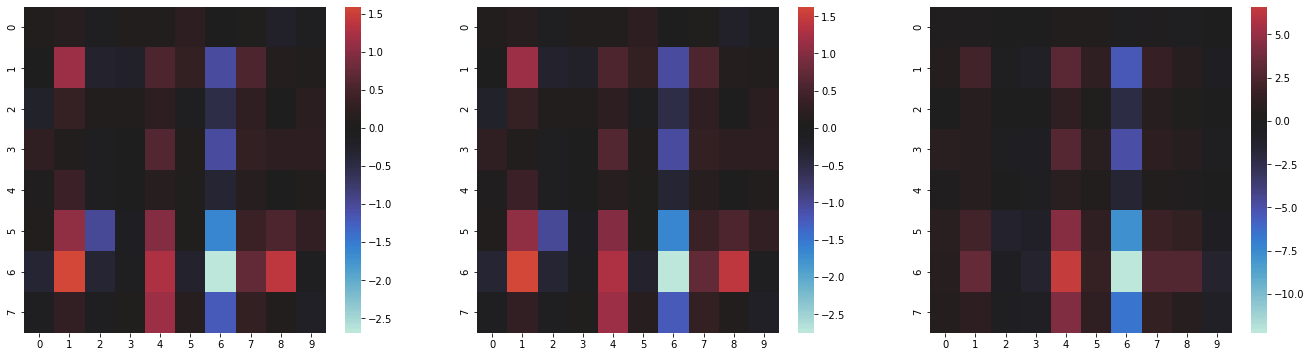

In [6]:
# Random select indeces of voxels in cortex and cerebellum

# cortex_index=np.random.randint(low=0.0, high=80, size=10)
# cortex_index=sorted(cortex_index)
cortex_index=[14, 28, 29, 36, 49, 51, 52, 59, 67, 75]

# cere_index=np.random.randint(low=0.0, high=6937, size=8)
# cere_index=sorted(cere_index)
cere_index=[358, 1217, 2409, 3152, 4066, 4997, 5665, 6683]

#read in data and random select 10 cortical voxels
X_cortex=pd.read_csv("X_cortex_tessels0042_mean_sc12.csv",index_col=[0])
X_cortex=X_cortex.iloc[:,cortex_index]

#read in the cerebellum data and random select 8 cerebellar voxels
Y_cere=pd.read_csv("Y_cere_mean_sc12.csv", index_col=[0])
Y_cere=Y_cere.iloc[:,cere_index]

#center data
X_center=X_cortex.apply(lambda x: x-x.mean())
X_center=np.array(X_center.T)
#print(X_center.shape)
Y_center=Y_cere.apply(lambda x: x-x.mean())
Y_center=np.array(Y_center.T)
#print(Y_center.shape)

N_Obs=X_center.shape[1]
p=Y_center.shape[0]
q=X_center.shape[0]

# Calculate the empirical covariance of X*
empi_cov_X=X_center@X_center.T/N_Obs

#Naive estimate
B_lse=(Y_center@X_center.T)/N_Obs@LA.inv(empi_cov_X)
print(f"B LSE :({B_lse.min(), B_lse.max()})")

#min_legend=-12
#max_legend=7
fig, ax =plt.subplots(1,3, figsize=(23, 6))
sns.heatmap(B_lse, ax=ax[0],center=0)#,vmin=min_legend, vmax=max_legend)

#set measurement error level
error_level_index1=0.02

#case 1. the cov of error is a full matrix and is related to the cov of true x
Sigma_Ex=error_level_index1*empi_cov_X
Sigma_trueX=(1-error_level_index1)*empi_cov_X

K1=empi_cov_X@LA.inv(Sigma_trueX)

B_correct1=B_lse@K1
print(f"B_correct (full Cov, error level 0.02):({B_correct1.min(),B_correct1.max()})")

sns.heatmap(B_correct1, ax=ax[1],center=0)#,vmin=min_legend, vmax=max_legend)

# Case 2. the cov of the measurement error is diagonal
cov_error_vec=empi_cov_X.diagonal()*error_level_index1
Sigma_Ex=np.eye(q)*np.diag(cov_error_vec)
Sigma_trueX=empi_cov_X-Sigma_Ex

K3=empi_cov_X@LA.inv(Sigma_trueX)

B_correct3=B_lse@K3
print(f"B_correct (identity Cov, error level 0.02):({B_correct3.min(), B_correct3.max()})")


sns.heatmap(B_correct3,ax=ax[2],center=0)#,vmin=min_legend, vmax=max_legend)
plt.show()

### Figure 3. Frobenious norm vs error level in [0.001, 0.025]

B LSE :((-2.695001355522455, 1.5936305566455349))


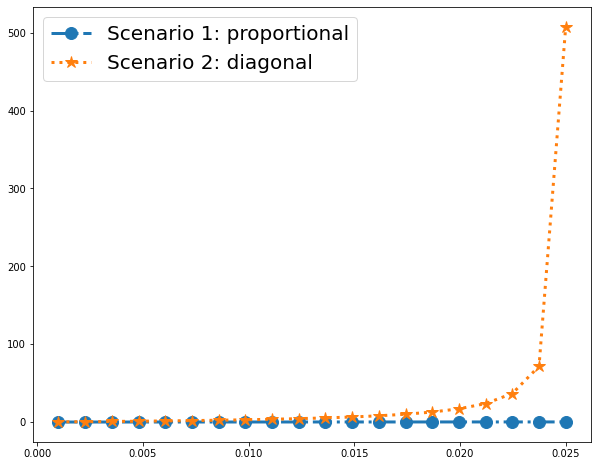

In [8]:
B_lse=(Y_center@X_center.T)/N_Obs@LA.inv(empi_cov_X)
print(f"B LSE :({B_lse.min(), B_lse.max()})")
sc1_norm_list=[]
sc2_norm_list=[]
for xi in np.linspace(start=0.001, stop=0.025, num=20):
    #Scenario 1. the cov of error is proportional to the cov of true x
    Sigma_Ex=xi*empi_cov_X
    Sigma_trueX=(1-xi)*empi_cov_X

    K1=empi_cov_X@LA.inv(Sigma_trueX)

    B_correct1=B_lse@K1
    sc1_norm_list.append(LA.norm(B_correct1-B_lse))
    #print(f"B corrrect 1: ({B_correct1.min(), B_correct1.max()})")
    
    #Scenario 2. Diagonal measurement error cov structure
    cov_error_vec=empi_cov_X.diagonal()*xi
    Sigma_Ex=np.eye(q)*np.diag(cov_error_vec)
    Sigma_trueX=empi_cov_X-Sigma_Ex

    K3=empi_cov_X@LA.inv(Sigma_trueX)

    B_correct3=B_lse@K3
    sc2_norm_list.append(LA.norm(B_correct3-B_lse))
    #print(f"B correct 2: ({B_correct3.min(), B_correct3.max()})")

fig=plt.subplots(figsize=(10, 8))
x=np.linspace(start=0.001, stop=0.025, num=20)    
plt.plot(x, sc1_norm_list, marker="o", markersize=12,linestyle="-.", linewidth=3,label="Scenario 1: proportional")
plt.plot(x, sc2_norm_list,marker="*",markersize=12, linestyle=":", linewidth=3,label="Scenario 2: diagonal")
plt.legend(loc='best', fontsize=20)
#plt.xlabel("$\xi$")
#plt.ylabel("$\|\hat{B}_{x^*c}-\hat{B}_{x^*}\|$")
plt.show()